# Minimum Wage Data by State and Country
This notebook runs through two different analyses on minimum wage:
1. Minimum Wage by State - identifying trends in minimum wage by state, and how this changes over the last decade.
2. Minimum Wage by Country - tracking minimum wage trends by country over the same time period, and identifying any underlying patterns among countries with similar trends.

## Minimum Wage by State
Dataset taken from the Labor Law Center, shows hourly minimum wage by state from 2010-2021 (projected).

In [20]:
import pandas as pd
min_wage_by_state = pd.read_csv("C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/LaborLawCenter-MinWageByState.csv")
min_wage_by_state.set_index('State', inplace = True)

# Feature engineering - adding a % change column to see increases by state
min_wage_by_state['% Change'] = min_wage_by_state['2021'] / min_wage_by_state['2010'] - 1

min_wage_by_state.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% Change
State,,,,,,,,,,,,,
Alabama,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,0.000000
Alaska,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84,9.89,10.19,10.34,0.334194
Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,11.00,12.00,12.15,0.675862
Arkansas,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.50,9.25,10.00,11.00,0.517241
California,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00,12.00,13.00,14.00,0.750000


<ipython-input-21-1c811cc21b01>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g = g.set(title = 'Distribution of % Change in Minimum Wage by State (2010-2021)',


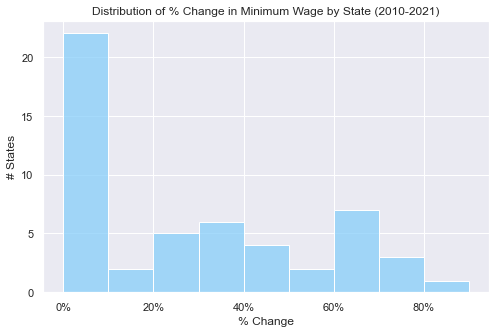

In [21]:
# Setting up Data Vis
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme()
# sns.set_palette("Blues")

# Graph
plt.figure(figsize=(8, 5))
g = sns.histplot(min_wage_by_state['% Change'], binwidth = 0.1, color = 'lightskyblue')
vals = g.get_xticks()
# g = g.set_
g = g.set(title = 'Distribution of % Change in Minimum Wage by State (2010-2021)', 
          xlabel = "% Change", ylabel = "# States",
          xticklabels = ['{:,.0%}'.format(x) for x in vals])

Graph above shows that roughly half of states in the US haven't raised their minimum wage by a significant amount over the last decade.

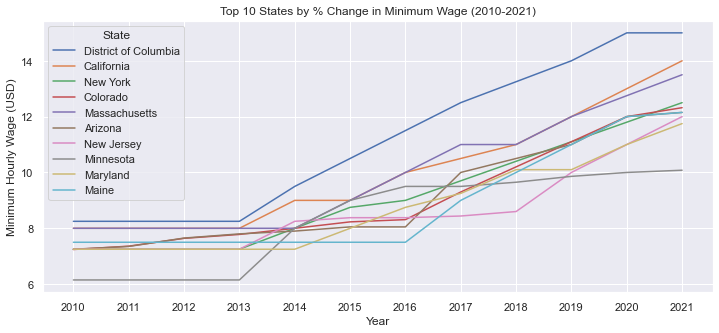

In [22]:
graph_data = min_wage_by_state.sort_values(by = '% Change', ascending = False)[0:10].drop(columns = ['% Change'])
graph_data = pd.melt(graph_data.reset_index(), id_vars = "State")

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'variable', hue = 'State', y = 'value')
g = g.set(title = 'Top 10 States by % Change in Minimum Wage (2010-2021)', xlabel = 'Year', ylabel = 'Minimum Hourly Wage (USD)')

Graph above shows that even states with steadily increasing minimum wage policies implemented minimal changes from 2010 through 2013. Need to do some further digging to understand if this is a data issue or a change in federal policy.

In [23]:
min_wage_by_state[min_wage_by_state['% Change'] == 0].shape

(22, 13)

In [24]:
min_wage_by_state[min_wage_by_state['2020'] == 7.25].shape

(21, 13)

## Minimum Wage by Country
This data comes in two parts - the minimum wage by country by year (OECD data) and the country characteristics by country in 2020 (World Bank data).

Wages are reported in local currency, 2017 PPP $, and USD. Local currency is difficult to interpret/compare and therefore dropped from the dataset.

In [25]:
# OECD Data
min_wage_by_country = pd.read_excel('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/OECD-MinWageByCountry.xlsx',
                                   skiprows = 5)
min_wage_by_country.drop(columns = ['Source type', 'Unnamed: 6'], inplace = True)
min_wage_by_country.rename(columns = {'Reference area': 'Country'}, inplace = True)
min_wage_by_country['Time'] = min_wage_by_country['Time'].astype('int')

# Rename some mismatched country names for matching later
oecd_rename = {'Bahamas': 'Bahamas, The',
              'Congo, Democratic Republic of the': 'Congo, Dem. Rep.',
              'Czechia': 'Czech Republic',
              "Côte d'Ivoire": "Cote d'Ivoire",
              'Egypt': 'Egypt, Arab Rep.',
              'Hong Kong, China': 'Hong Kong SAR, China',
              'Iran, Islamic Republic of': 'Iran, Islamic Rep.',
              'Korea, Republic of': 'Korea, Rep.',
              'Kyrgyzstan': 'Kyrgyz Republic',
              "Lao People's Democratic Republic": 'Lao PDR',
              'Moldova, Republic of': 'Moldova',
              'Venezuela, Bolivarian Republic of': 'Venezuela, RB',
              'Viet Nam': 'Vietnam'}
min_wage_by_country.replace({'Country': oecd_rename}, inplace = True)

min_wage_by_country.set_index(['Country', 'Time'], inplace = True)
min_wage_by_country.head()

Local currency  2017 PPP $  U.S. dollars
Country     Time                                          
Afghanistan 2010          4000.0      258.23         86.11
            2011          5000.0      297.83        106.96
            2012          5000.0      292.57         98.19
            2013          5000.0      283.19         90.29
            2015          5000.0      290.79         81.77

In [26]:
# World Bank Data
world_dev_ind = pd.read_csv('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/WorldBank-WDIByCountry.csv')
world_dev_ind.drop(columns = ['Country Code', 'Indicator Code', 'Unnamed: 65'], inplace = True)
world_dev_ind.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,"Access to electricity, urban (% of urban popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [27]:
# Commented out to save space

# 1440 unique indicators per country is way more than we need; here's the full list:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10000, 'display.max_colwidth', 100):
    display(pd.Series(world_dev_ind['Indicator Name'].unique()))

0                                      Access to clean fuels and technologies for cooking (% of population)
1                                                                   Access to electricity (% of population)
2                                                      Access to electricity, rural (% of rural population)
3                                                      Access to electricity, urban (% of urban population)
4       Account ownership at a financial institution or with a mobile-money-service provider (% of popul...
5       Account ownership at a financial institution or with a mobile-money-service provider, female (% ...
6       Account ownership at a financial institution or with a mobile-money-service provider, male (% of...
7       Account ownership at a financial institution or with a mobile-money-service provider, older adul...
8       Account ownership at a financial institution or with a mobile-money-service provider, poorest 40...
9       Account ownership at

In [28]:
# Arbitrarily picking some interesting indicators
narrow_indicators = [                    
                     # GDP-related indicators
                     'GDP (current US$)',
                     'GDP growth (annual %)',
                     'Trade (% of GDP)',
                     'Current health expenditure (% of GDP)',
                     'Tax revenue (% of GDP)',
                     'Military expenditure (% of GDP)',
                     
                     # Income disparity
                     'Income share held by highest 10%',
                     'Income share held by lowest 10%',
                     'International migrant stock, total',
    
                     # Gender disparity
                     'Labor force, female (% of total labor force)',
                     'Women Business and the Law Index Score (scale 1-100)',

                     # Other stats
                     'Land area (sq. km)',
                     'Air transport, passengers carried',
                     'CO2 emissions (kt)',
                     'Labor force, total',
                     'Population, total',
                     'Urban population (% of total population)',
                     'Current health expenditure per capita (current US$)',
                     'Ease of doing business score (0 = lowest performance to 100 = best performance)'
                     ]

# Filtering down the dataset
world_dev_ind = world_dev_ind[world_dev_ind['Indicator Name'].isin(narrow_indicators)]

In [29]:
# Pivoting and unpivoting data to get indicators above from 2010-2020 in a usable format
world_dev_ind = pd.melt(world_dev_ind, id_vars = ['Country Name', 'Indicator Name'], var_name = 'Time')
world_dev_ind['Time'] = world_dev_ind['Time'].astype('int')
world_dev_ind = world_dev_ind[world_dev_ind['Time'] > 2009]
world_dev_ind.rename(columns = {'Country Name': 'Country'}, inplace = True)
world_dev_ind= pd.pivot(world_dev_ind, index = ['Country', 'Time'], columns = ['Indicator Name'], values = ['value'])
world_dev_ind.columns = pd.Series(narrow_indicators).sort_values()

# Final datatset
world_dev_ind.head()

Air transport, passengers carried  CO2 emissions (kt)  \
Country     Time                                                          
Afghanistan 2010                       1.999127e+06            8463.436   
            2011                       2.279341e+06           12240.446   
            2012                       1.737962e+06           10755.311   
            2013                       2.044188e+06            9050.156   
            2014                       2.209428e+06            8467.103   

                  Current health expenditure (% of GDP)  \
Country     Time                                          
Afghanistan 2010                               8.569672   
            2011                               8.561907   
            2012                               7.897168   
            2013                               8.805964   
            2014                               9.528878   

                  Current health expenditure per capita (current US$)  \
Country     Time                                                        
Afghanistan 2010                                          44.990532     
            2011                                          50.853474     
            2012                                          51.440262     
            2013                                          55.034630     
            2014                                          59.008934     

                  Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country     Time                                                                                    
Afghanistan 2010                                                NaN                                 
            2011                                                NaN                                 
            2012                                                NaN                                 
            2013                                                NaN                                 
            2014                                                NaN                                 

                  GDP (current US$)  GDP growth (annual %)  \
Country     Time                                             
Afghanistan 2010       1.585657e+10              14.362441   
            2011       1.780429e+10               0.426355   
            2012       2.000160e+10              12.752287   
            2013       2.056107e+10               5.600745   
            2014       2.048489e+10               2.724543   

                  Income share held by highest 10%  \
Country     Time                                     
Afghanistan 2010                               NaN   
            2011                               NaN   
            2012                               NaN   
            2013                               NaN   
            2014                               NaN   

                  Income share held by lowest 10%  \
Country     Time                                    
Afghanistan 2010                              NaN   
            2011                              NaN   
            2012                              NaN   
            2013                              NaN   
            2014                              NaN   

                  International migrant stock, total  \
Country     Time                                       
Afghanistan 2010                            102246.0   
            2011                                 NaN   
            2012                                 NaN   
            2013                                 NaN   
            2014                                 NaN   

                  Labor force, female (% of total labor force)  \
Country     Time                                                 
Afghanistan 2010                                     15.366971   
            2011                                     15.703252   
            201

In [30]:
# Join the World Bank & OECD data
country_data = min_wage_by_country.merge(world_dev_ind, how = 'inner', on = ['Country', 'Time'])
country_data.head()

Local currency  2017 PPP $  U.S. dollars  \
Country     Time                                             
Afghanistan 2010          4000.0      258.23         86.11   
            2011          5000.0      297.83        106.96   
            2012          5000.0      292.57         98.19   
            2013          5000.0      283.19         90.29   
            2015          5000.0      290.79         81.77   

                  Air transport, passengers carried  CO2 emissions (kt)  \
Country     Time                                                          
Afghanistan 2010                       1.999127e+06            8463.436   
            2011                       2.279341e+06           12240.446   
            2012                       1.737962e+06           10755.311   
            2013                       2.044188e+06            9050.156   
            2015                       1.929907e+06            9035.488   

                  Current health expenditure (% of GDP)  \
Country     Time                                          
Afghanistan 2010                               8.569672   
            2011                               8.561907   
            2012                               7.897168   
            2013                               8.805964   
            2015                              10.105348   

                  Current health expenditure per capita (current US$)  \
Country     Time                                                        
Afghanistan 2010                                          44.990532     
            2011                                          50.853474     
            2012                                          51.440262     
            2013                                          55.034630     
            2015                                          58.906528     

                  Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country     Time                                                                                    
Afghanistan 2010                                                NaN                                 
            2011                                                NaN                                 
            2012                                                NaN                                 
            2013                                                NaN                                 
            2015                                           39.25519                                 

                  GDP (current US$)  GDP growth (annual %)  ...  \
Country     Time                                            ...   
Afghanistan 2010       1.585657e+10              14.362441  ...   
            2011       1.780429e+10               0.426355  ...   
            2012       2.000160e+10              12.752287  ...   
            2013       2.056107e+10               5.600745  ...   
            2015       1.990711e+10               1.451315  ...   

                  International migrant stock, total  \
Country     Time                                       
Afghanistan 2010                            102246.0   
            2011                                 NaN   
            2012                                 NaN   
            2013                                 NaN   
            2015                            382365.0   

                  Labor force, female (% of total labor force)  \
Country     Time                                                 
Afghanistan 2010                                     15.366971   
            2011                                     15.703252   
            2012                                     16.114022   
            2013                                     16.959322   
            2015                                     18.786208   

                  Labor force, total  Land area (sq. km)  \
Country     Time                     

In [31]:
country_data = country_data.reset_index()

## Main Analysis
Now that we have the dataset above with selected World Bank indicators by country by year, we can start diving into some analysis.

In [32]:
g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia',
       'Japan', 'Korea, Rep.', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom',
       'United States'] # Missing Italy and Mexico in OECD data
g7 = ['United States', 'United Kingdom', 'France', 'Japan', 'Germany', 'Italy', 'Canada']

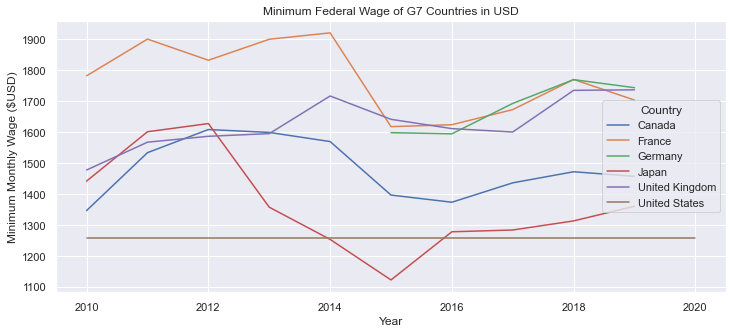

In [33]:
graph_data = country_data[country_data['Country'].isin(g7)]

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country', y = 'U.S. dollars')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in USD', xlabel = 'Year', ylabel = 'Minimum Monthly Wage ($USD)')

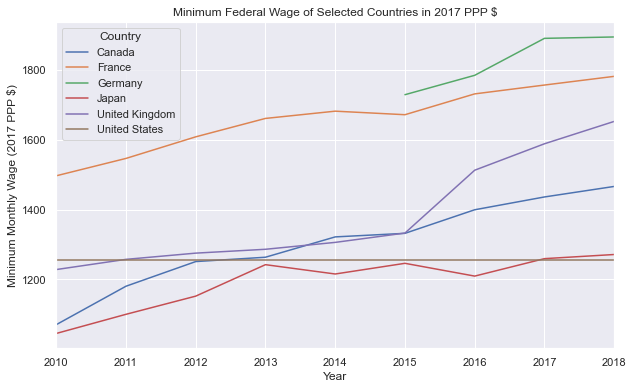

In [34]:
graph_data = country_data[country_data['Country'].isin(g7)]

plt.figure(figsize=(10, 6))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country', y = '2017 PPP $')
g = g.set(title = 'Minimum Federal Wage of Selected Countries in 2017 PPP $', 
          xlabel = 'Year', ylabel = 'Minimum Monthly Wage (2017 PPP $)',
         xlim = (2010, 2018))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


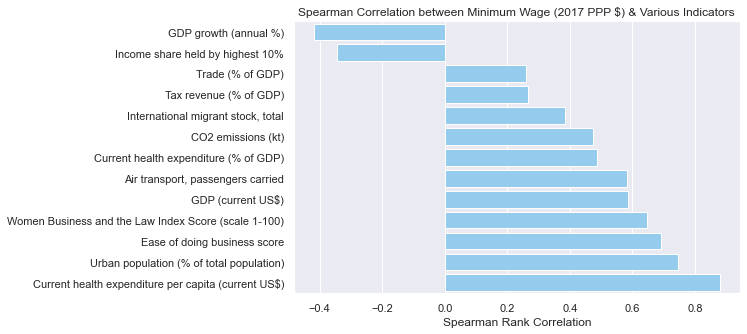

In [58]:
# Identifying correlation between minimum monthly wage and World Bank Indicators
graph_data = country_data[country_data.columns[2:]].corr(method = 'spearman')['2017 PPP $'].sort_values()[:-2]
as_list = graph_data.index.tolist()
idx = as_list.index('Ease of doing business score (0 = lowest performance to 100 = best performance)')
as_list[idx] = 'Ease of doing business score'
graph_data.index = as_list
graph_data = graph_data[(graph_data < -.2) | (graph_data > 0.2)]

plt.figure(figsize=(8, 5))
g = sns.barplot(graph_data.values, graph_data.index, color = 'lightskyblue')
g = g.set(title = 'Spearman Correlation between Minimum Wage (2017 PPP $) & Various Indicators', 
          xlabel = 'Spearman Rank Correlation')

According to the chart above, higher health expenditure, higher % urban population, and higher ease of doing business all are all positiviely correlated with minimum monthly wages. However, countries with a high GDP annual growth tend to have lower minimum wages, as do countries with greater land area and military expenditure.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


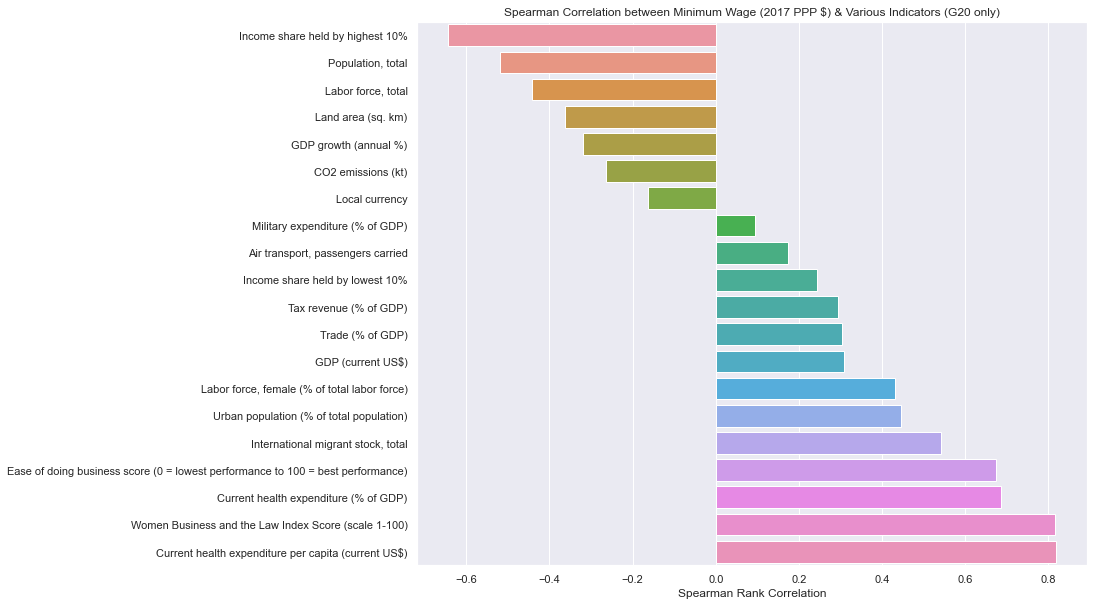

In [36]:
# Identifying correlation between minimum monthly wage and World Bank Indicators
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data[graph_data.columns[2:]].corr(method = 'spearman')['2017 PPP $'].sort_values()[:-2]

plt.figure(figsize=(12, 10))
g = sns.barplot(graph_data.values, graph_data.index)
g = g.set(title = 'Spearman Correlation between Minimum Wage (2017 PPP $) & Various Indicators (G20 only)', 
          xlabel = 'Spearman Rank Correlation')

Graph above shows that within the G20, smaller countries with steady GDP and low C02 emissions tend to have much higher adjusted monthly minimum wages.

<ipython-input-46-059739e32ca0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g = g.set(title = 'Distribution of % Change in Minimum Wage by Country (2010-2019)',


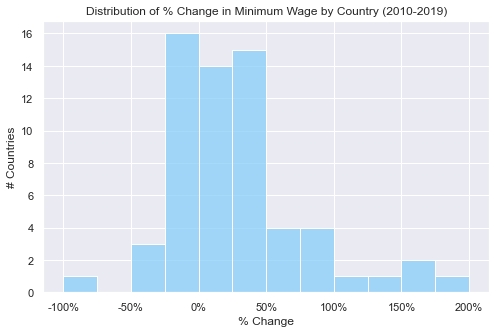

In [46]:
graph_data = country_data.pivot(index = ['Country'], columns = ['Time'], values = ['U.S. dollars'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[9] / graph_data[0] - 1

# Graph
import numpy as np
plt.figure(figsize=(8, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.25, binrange = [-1, 2], color = 'lightskyblue')
vals = g.get_xticks()
g = g.set(title = 'Distribution of % Change in Minimum Wage by Country (2010-2019)', 
          xlabel = "% Change", ylabel = "# Countries",
          xticklabels = ['{:,.0%}'.format(x) for x in vals])

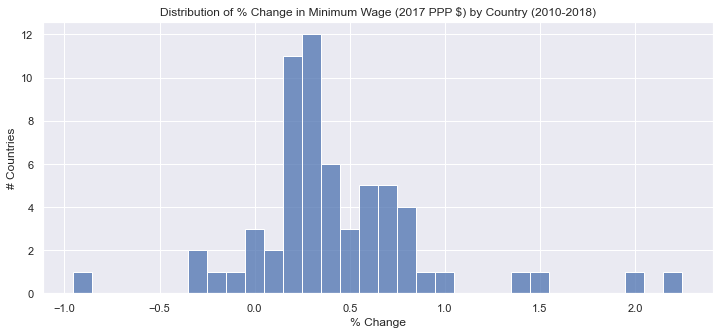

In [19]:
graph_data = country_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1 # Note this was changed to 2018 from above to allow for more data

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage (2017 PPP $) by Country (2010-2018)', 
          xlabel = "% Change", ylabel = "# Countries")

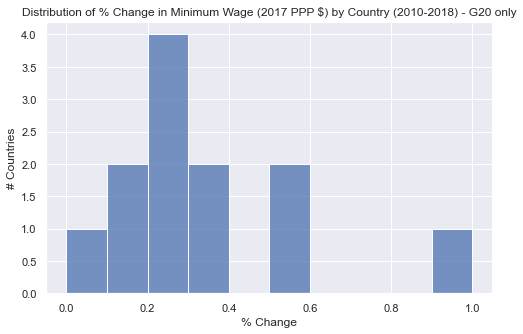

In [20]:
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1 # Note this was changed to 2018 from above to allow for more data

# Graph
plt.figure(figsize=(8, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage (2017 PPP $) by Country (2010-2018) - G20 only', 
          xlabel = "% Change", ylabel = "# Countries")

All three histograms above show similar stories - most countries have raised federal monthly wages between 20-30% over the last decade, whether it's in nominal USD, PPP adjusted, or filtered down to just G20 nations.

<ipython-input-51-252947d88e42>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g = g.set(title = '% Change in Minimum Wage (2017 PPP $) by Country (2010-2018)', xlabel = "% Change",


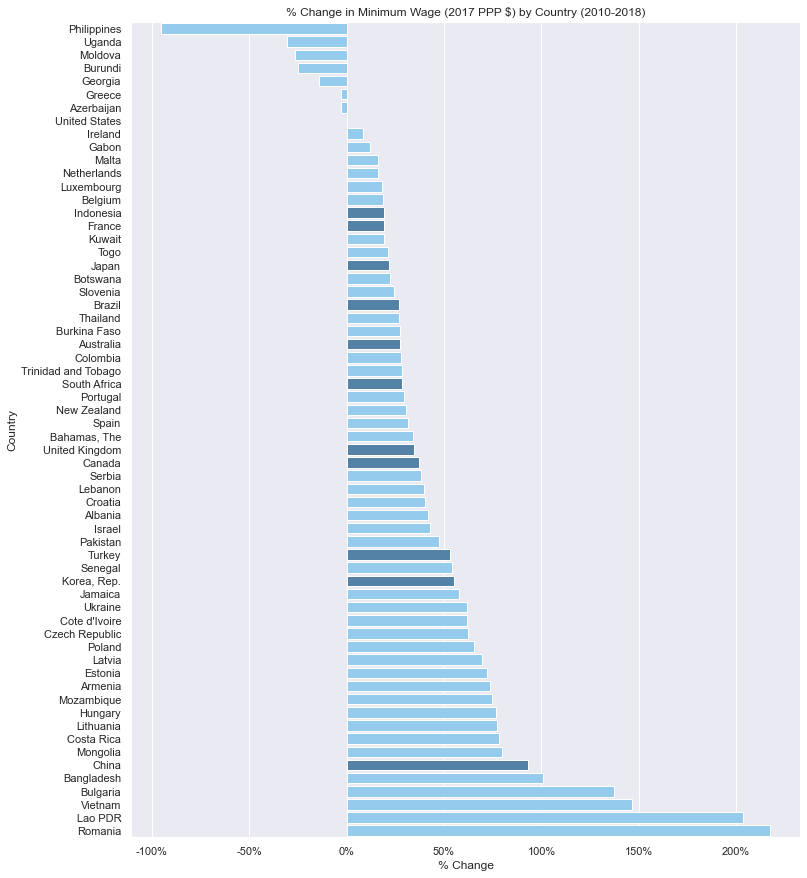

In [51]:
graph_data = country_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1
graph_data = graph_data['% Change'].sort_values().reset_index().dropna()
graph_data['is_g20'] = 'lightskyblue'
graph_data.loc[graph_data['Country'].isin(g20), 'is_g20'] = 'steelblue' 

# Graph
plt.figure(figsize=(12, 15))
g = sns.barplot(data = graph_data, x = '% Change', y = 'Country', palette = graph_data['is_g20'])
vals = g.get_xticks()
g = g.set(title = '% Change in Minimum Wage (2017 PPP $) by Country (2010-2018)', xlabel = "% Change",
          xticklabels = ['{:,.0%}'.format(x) for x in vals])

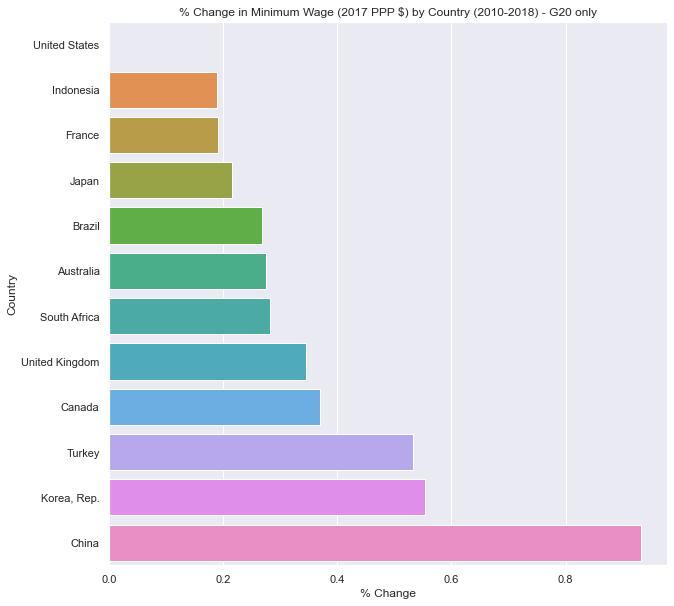

In [22]:
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1
graph_data = graph_data['% Change'].sort_values().reset_index().dropna()

# Graph
plt.figure(figsize=(10, 10))
g = sns.barplot(data = graph_data, x = '% Change', y = 'Country')
g = g.set(title = '% Change in Minimum Wage (2017 PPP $) by Country (2010-2018) - G20 only', xlabel = "% Change")

Above charts show % change in minimum wage (adjusted for PPP). We're missing PPP adjusted data for a few countries, including Italy, Mexico, and Germany so they're excluded above.

In [23]:
graph_data = country_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1
sum(graph_data['% Change'] > 0) / sum(~graph_data['% Change'].isna())

0.8709677419354839

In [24]:
sum(~graph_data['% Change'].isna())

62

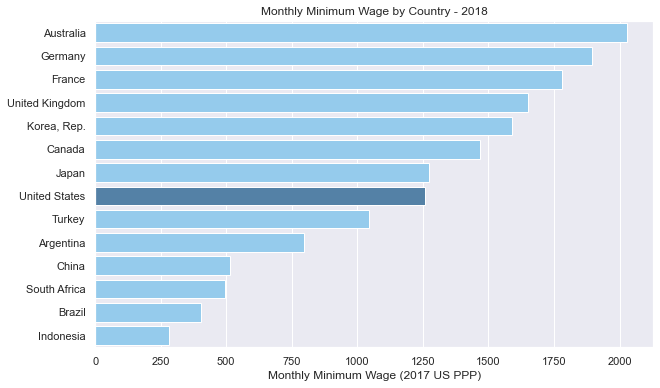

In [25]:
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data[(graph_data['Time'] == 2018) & (graph_data['Country'] != "Russian Federation")]
graph_data = graph_data.sort_values('2017 PPP $', ascending = False)
graph_data['is_US'] = 'lightskyblue'
graph_data.loc[graph_data['Country'] == 'United States', 'is_US'] = 'steelblue' 

# Graph
plt.figure(figsize=(10, 6))
g = sns.barplot(data = graph_data, x = '2017 PPP $', y = 'Country', ci = None, palette = graph_data['is_US'])
g = g.set(title = 'Monthly Minimum Wage by Country - 2018', xlabel = "Monthly Minimum Wage (2017 US PPP)", ylabel = None)

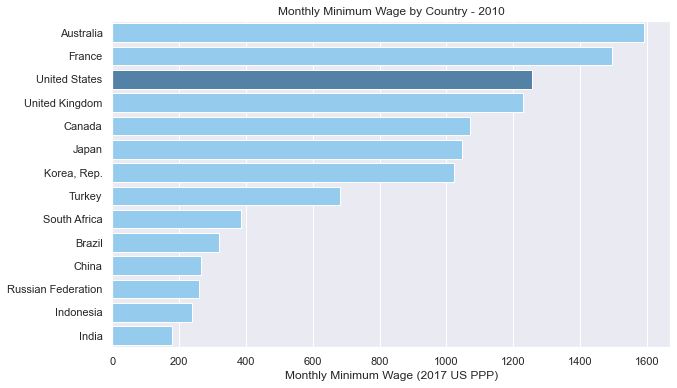

In [43]:
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data[(graph_data['Time'] == 2010) & (graph_data['Country'] != "Argentina")]
graph_data = graph_data.sort_values('2017 PPP $', ascending = False)
graph_data['is_US'] = 'lightskyblue'
graph_data.loc[graph_data['Country'] == 'United States', 'is_US'] = 'steelblue' 

# Graph
plt.figure(figsize=(10, 6))
g = sns.barplot(data = graph_data, x = '2017 PPP $', y = 'Country', ci = None, palette = graph_data['is_US'])
g = g.set(title = 'Monthly Minimum Wage by Country - 2010', xlabel = "Monthly Minimum Wage (2017 US PPP)", ylabel = None)

## Calculating Policy Changes
Assuming Biden increases minimum wage to $15/hour.

In [26]:
current_monthly_wage = country_data[country_data['Country'] == 'United States']['U.S. dollars'].min()
new_wages = [current_monthly_wage / 7.25 * 9.5,
             current_monthly_wage / 7.25 * 11.0,
             current_monthly_wage / 7.25 * 13.0,
             current_monthly_wage / 7.25 * 15.00]
us_data = country_data.copy()[country_data['Country'] == 'United States']
us_data['Country'] = 'United States (proposed)'
us_data = us_data.append(pd.DataFrame({'Country': 'United States (proposed)',
              'Time': [2021, 2022, 2023, 2024],
              '2017 PPP $': new_wages,
              'U.S. dollars': new_wages}))
country_data2 = country_data.append(us_data)

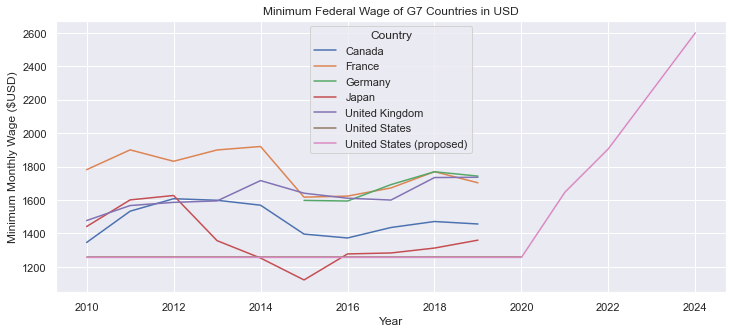

In [27]:
graph_data = country_data2[country_data2['Country'].isin(g7 + ['United States (proposed)'])]
graph_data

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country', y = 'U.S. dollars')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in USD', xlabel = 'Year', ylabel = 'Minimum Monthly Wage ($USD)')

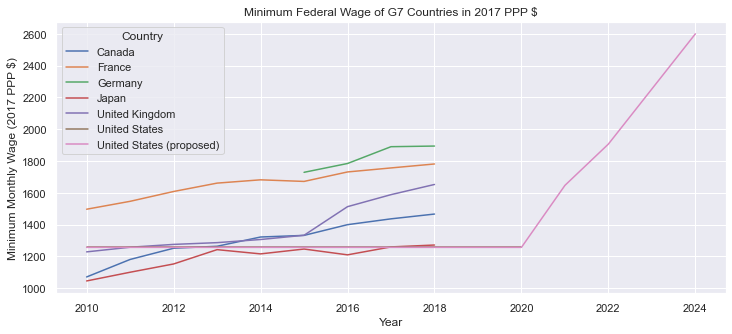

In [28]:
graph_data = country_data2[country_data2['Country'].isin(g7 + ['United States (proposed)'])]

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country', y = '2017 PPP $')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in 2017 PPP $', xlabel = 'Year', ylabel = 'Minimum Monthly Wage (2017 PPP $)')

## Misc Stats

In [44]:
# % countries with higher wage than U.S.
higher_wage = len(country_data[(country_data['Time'] == 2018) & (country_data['2017 PPP $'] > current_monthly_wage)])
total_available = len(country_data2[(country_data['Time'] == 2018) & (country_data['2017 PPP $'].notna())])
print("%.1f%% (%d out of %d) countries available had higher wages than the U.S. in 2018" % (higher_wage/total_available * 100, higher_wage, total_available))

# % countries with higher wage than U.S.
higher_wage = len(country_data[(country_data['Time'] == 2010) & (country_data['2017 PPP $'] > current_monthly_wage)])
total_available = len(country_data2[(country_data['Time'] == 2010) & (country_data['2017 PPP $'].notna())])
print("%.1f%% (%d out of %d) countries available had higher wages than the U.S." % (higher_wage/total_available * 100, higher_wage, total_available))

20.8% (15 out of 72) countries available had higher wages than the U.S. in 2018
6.9% (7 out of 101) countries available had higher wages than the U.S.


<ipython-input-44-9fa8346172d3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_available = len(country_data2[(country_data['Time'] == 2018) & (country_data['2017 PPP $'].notna())])
<ipython-input-44-9fa8346172d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_available = len(country_data2[(country_data['Time'] == 2010) & (country_data['2017 PPP $'].notna())])


In [30]:
country_data['Country'].nunique()

130

In [31]:
graph_data = country_data.pivot(index = ['Country'], columns = ['Time'], values = ['U.S. dollars'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[9] / graph_data[0] - 1
graph_data

# % countries with increased wage
increased_wage = len(graph_data[graph_data['% Change'] > 0])
total_available = len(graph_data[graph_data['% Change'].notna()])
print("%.1f%% (%d out of %d) countries available increased min wage" % (increased_wage/total_available * 100, 
                                                                        increased_wage, total_available))

66.7% (42 out of 63) countries available increased min wage


In [32]:
graph_data = country_data[country_data['Country'].isin(g20)]
graph_data = graph_data.pivot(index = ['Country'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1 # Note this was changed to 2018 from above to allow for more data
graph_data

# % countries with increased wage
increased_wage = len(graph_data[graph_data['% Change'] > 0])
total_available = len(graph_data[graph_data['% Change'].notna()])
print("%.1f%% (%d out of %d) countries available increased min wage" % (increased_wage/total_available * 100, 
                                                                        increased_wage, total_available))

91.7% (11 out of 12) countries available increased min wage


### Country Stories

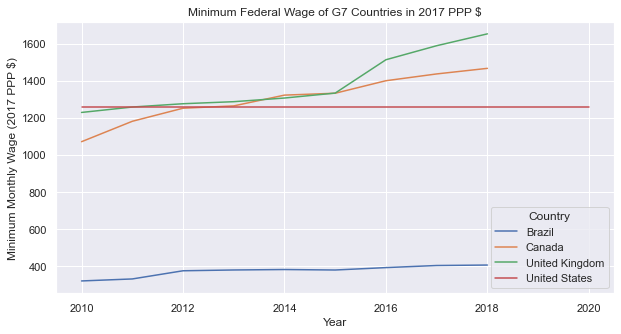

In [33]:
graph_data = country_data[country_data['Country'].isin(['Canada', 'United States', 'United Kingdom', 'Brazil'])]
graph_data

plt.figure(figsize=(10, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country', y = '2017 PPP $')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in 2017 PPP $', xlabel = 'Year', ylabel = 'Minimum Monthly Wage (2017 PPP $)')

In [34]:
canada_2010 = country_data.loc[(country_data['Country'] == "Canada") & (country_data['Time'] == 2010), '2017 PPP $'].min()
canada_2018 = country_data.loc[(country_data['Country'] == "Canada") & (country_data['Time'] == 2018), '2017 PPP $'].min()
print("Canada had a %.1f%% increase in minimum wage, from %.1f to %.1f" % (canada_2018/canada_2010*100-100, canada_2010, canada_2018))
print("In 2010 Canada was %.1f%% below the US, and now is %.1f%% above the US" % (-(canada_2010/current_monthly_wage*100 - 100), canada_2018/current_monthly_wage*100 - 100))

Canada had a 37.0% increase in minimum wage, from 1070.6 to 1466.3
In 2010 Canada was 14.8% below the US, and now is 16.7% above the US


In [35]:
uk_2010 = country_data.loc[(country_data['Country'] == "United Kingdom") & (country_data['Time'] == 2010), '2017 PPP $'].min()
uk_2018 = country_data.loc[(country_data['Country'] == "United Kingdom") & (country_data['Time'] == 2018), '2017 PPP $'].min()
print("The UK had a %.1f%% increase in minimum wage, from %.1f to %.1f" % (uk_2018/uk_2010*100-100, uk_2010, uk_2018))
print("In 2010 the UK was %.1f%% below the US, and now is %.1f%% above the US" % (-(uk_2010/current_monthly_wage*100 - 100), uk_2018/current_monthly_wage*100 - 100))

The UK had a 34.5% increase in minimum wage, from 1228.4 to 1652.4
In 2010 the UK was 2.3% below the US, and now is 31.5% above the US


In [36]:
min_wage_by_country.loc['United States']

,Local currency,2017 PPP $,U.S. dollars
Time,,,
2010,1256.67,1256.67,1256.67
2011,1256.67,1256.67,1256.67
2012,1256.67,1256.67,1256.67
2013,1256.67,1256.67,1256.67
2014,1256.67,1256.67,1256.67
2015,1256.67,1256.67,1256.67
2016,1256.67,1256.67,1256.67
2017,1256.67,1256.67,1256.67
2018,1256.67,1256.67,1256.67


In [37]:
brazil_2010 = country_data.loc[(country_data['Country'] == "Brazil") & (country_data['Time'] == 2010), '2017 PPP $'].min()
brazil_2018 = country_data.loc[(country_data['Country'] == "Brazil") & (country_data['Time'] == 2018), '2017 PPP $'].min()
print("Brazil had a %.1f%% increase in minimum wage, from %.1f to %.1f" % (brazil_2018/brazil_2010*100-100, brazil_2010, brazil_2018))
print("In 2010 Brazil was %.1f%% below the US, and now is %.1f%% above the US" % (-(brazil_2010/current_monthly_wage*100 - 100), 
                                                                                  brazil_2018/current_monthly_wage*100 - 100))

Brazil had a 26.9% increase in minimum wage, from 319.3 to 405.1
In 2010 Brazil was 74.6% below the US, and now is -67.8% above the US
